<h1><center>Série Temporelles<center><h1/>

In [89]:
import numpy as np
import pandas as pd
import pathlib

data_path = pathlib.Path("../textfiles")

import bokeh.plotting as bkp
import bokeh.models as bkm
import bokeh.layouts as bkl
from bokeh.palettes import d3
bkp.output_notebook()

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats import f, t

%load_ext autoreload
%autoreload 2

Loading BokehJS ...

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tracé d'un processus AR(1) pour différrents $\alpha$

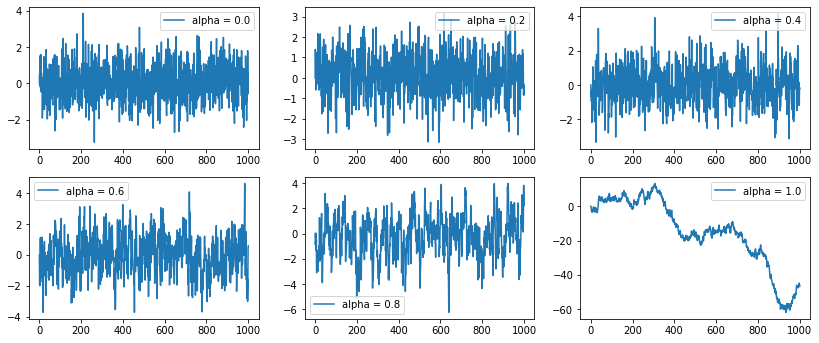

In [167]:
rng = np.random.RandomState(42)
y_0 = 0
n = 1000
y = []
alphas = [0.1*k for k in range(0, 12, 2)]
y.append(y_0)

plt.figure(figsize=(14, 12))
for i, alpha in enumerate(alphas):
    for k in range(n):
        y.append(alpha*y[-1] + rng.randn(1))
    plt.subplot(4, 3, i+1)
    plt.plot(y, label=f'alpha = {round(alpha, 1)}')
    plt.legend()
    y = []
    y.append(y_0)
    

plt.show()

In [49]:
data = pd.read_csv(data_path / 'fertil3.raw', delim_whitespace=True, header=None, skiprows=1)

columns =  ["gfr", "pe", "year", "t"         ,"tsq" ,      "pe_1"   ,   "pe_2",    "pe_3"  ,   
"pe_4" ,     "pill"   ,   "ww2"   ,    "tcu"   ,    "cgfr"   ,   "cpe"     ,  "cpe_1" ,    "cpe_2"    
"cpe_3"   ,  "cpe_4"   ,  "gfr_1"   ,  "cgfr_1",    "cgfr_2"  ,  "cgfr_3" ,   "cgfr_4"  ,  "gfr_2" ]  

data = data.rename(columns={i : columns[i] for i in range(len(columns))})
data.head(2)

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2,23
0,126.6,0.0,1914,2,4,0.0,.,.,.,0,...,.,.,.,.,124.7,.,.,.,.,.
1,125.0,0.0,1915,3,9,0.0,0,.,.,0,...,0,.,.,.,126.6,1.900002,.,.,.,124.7


# Tracé du taux de naissance par 1000 femmes 

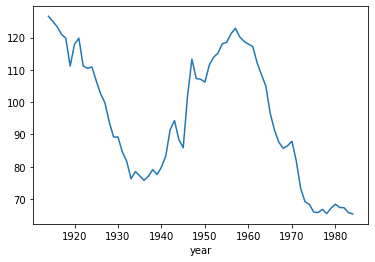

In [57]:
data.set_index("year").iloc[:, 0].plot()
plt.show()

* Moyenne mobile du signal

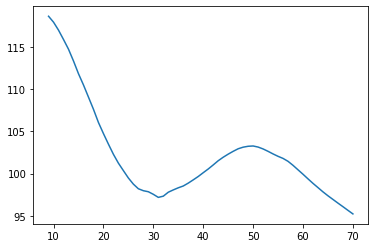

In [75]:
data.gfr.rolling(100, min_periods=10).mean().plot()
plt.show()

# Question 2

Calculer la s ́erie $dl = log(gfr_{t}) − log(gfr_{t-1})$ et commenter le nouveau graphique. Calculer ensuite la s ́erie gfr en taux d’acroissement et comparer cetter nouvelle s ́erie `a la s ́erie pr ́ec ́edente

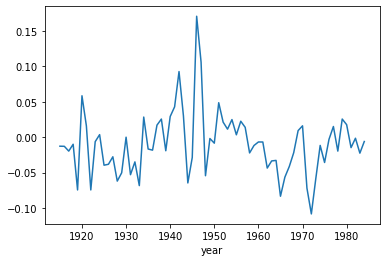

In [65]:
data["dl"] = np.log(data.gfr) - np.log(data.gfr.shift(1))
data[["dl", "year"]].set_index("year").iloc[:, 0].plot()
plt.show()

* Moyenne mobile du signal

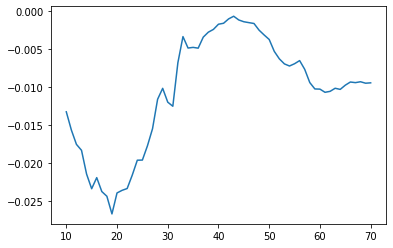

In [76]:
data.dl.rolling(100, min_periods=10).mean().plot()
plt.show()

# Question 3

Calculer l’auto-covariance d’ordre 1, 10 et 20 de dl

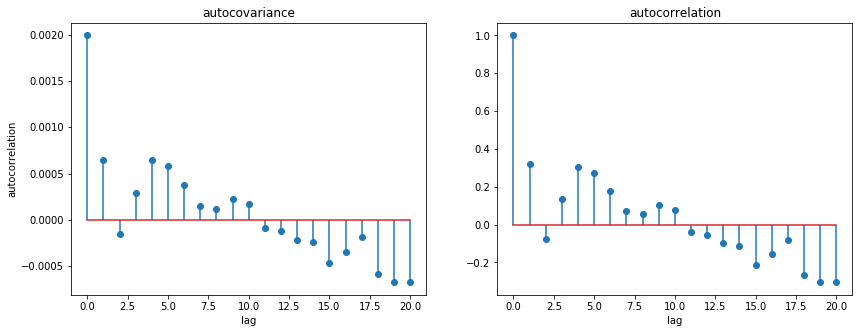

In [130]:
def autocov_corr(lag):
    dl_lag = data.dl.shift(lag).dropna()
    dl = data.dl[lag+1:]
    
    cov = np.cov(dl, dl_lag)
    corrcoef = np.corrcoef(dl, dl_lag)
    return cov[0, 1], corrcoef[0, 1]


autocorr = []
autocov = []
lags = range(0, 21)

for lag in lags:
    autocov.append(autocov_corr(lag)[0])
    autocorr.append(autocov_corr(lag)[1])
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.stem(lags, autocov, use_line_collection=True)
ax1.set_title("autocovariance")
ax1.set_xlabel("lag")
ax1.set_ylabel("autocovariance")

ax2.stem(lags, autocorr, use_line_collection=True)
ax2.set_title("autocorrelation")
ax2.set_xlabel("lag")
ax1.set_ylabel("autocorrelation")

plt.show()

# Question 4

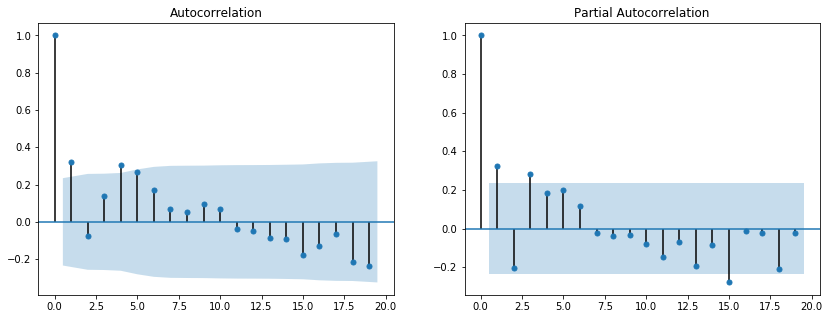

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
dl = data.dl.dropna()
plot_acf(dl, ax=ax1)
plot_pacf(dl, ax=ax2)
plt.show()

# Question 5

Estimer le modèle AR(1) et AR(3) pour dl. Calculer l’AIC et le BIC dans chacun des cas. Faire ensuite une boucle de l’AR(1) jusqu’à l’AR(10) et déterminer l’ordre p de AR(p)

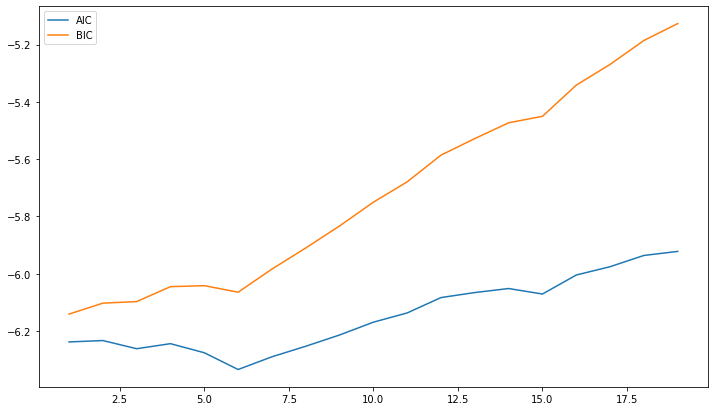

lag optimal selon le critère BIC: 1
lag optimal selon le critère AIC: 6


In [158]:
import statsmodels.tsa.api as smt #deprecated
from statsmodels.tsa.ar_model import AutoReg


AIC = []
BIC = []

for lag in range(1, 20):
    ar_model = AutoReg(dl.values, lags=lag).fit()
    
    AIC.append(ar_model.aic)
    BIC.append(ar_model.bic)

plt.figure(figsize=(12, 7))
plt.plot(range(1, 20), AIC, label="AIC")
plt.plot(range(1, 20), BIC, label='BIC')
plt.legend()
plt.show()

print(f"lag optimal selon le critère BIC: {np.argmin(BIC) + 1}")
print(f"lag optimal selon le critère AIC: {np.argmin(AIC) + 1}")